In [38]:
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import colors
from astropy import units as u

# Read slices and it coordinate from .txt

In [75]:
slicesdir='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/analysis results/newresults/slices/'
slices_name=np.array([str(i)+'.out' for i in range(15)])
slices_xname='slicesx.out'
slices_yname='slicesy.out'
slices_locname='slices_loc.out'

In [76]:
x=np.genfromtxt(slicesdir+slices_xname,delimiter=',')
y=np.genfromtxt(slicesdir+slices_yname,delimiter=',')
slices_loc=np.genfromtxt(slicesdir+slices_locname,delimiter=',')
Slices=[]
for name in slices_name:
    Slices.append(np.genfromtxt(slicesdir+name,delimiter=','))
Slices=np.array(Slices)

# Intialize sources

In [77]:
sources=np.array([[40.052625, 220.3519792], [40.05221366, 220.3519858],
                  [40.05297755, 220.3520401], [40.05222735, 220.3493004],
                  [40.0534915, 220.3529473], [40.05224151, 220.3531833],
                  [40.0535024, 220.349928],[40.05106072, 220.3497904]])*u.deg
refpoint=np.array([40.052625, 220.3519792])*u.deg
sources=(sources-refpoint).to(u.arcsec).value
sources

array([[ 0.      ,  0.      ],
       [-1.480824,  0.02376 ],
       [ 1.26918 ,  0.21924 ],
       [-1.43154 , -9.64368 ],
       [ 3.1194  ,  3.48516 ],
       [-1.380564,  4.33476 ],
       [ 3.15864 , -7.38432 ],
       [-5.631408, -7.87968 ]])

# Plot each slices

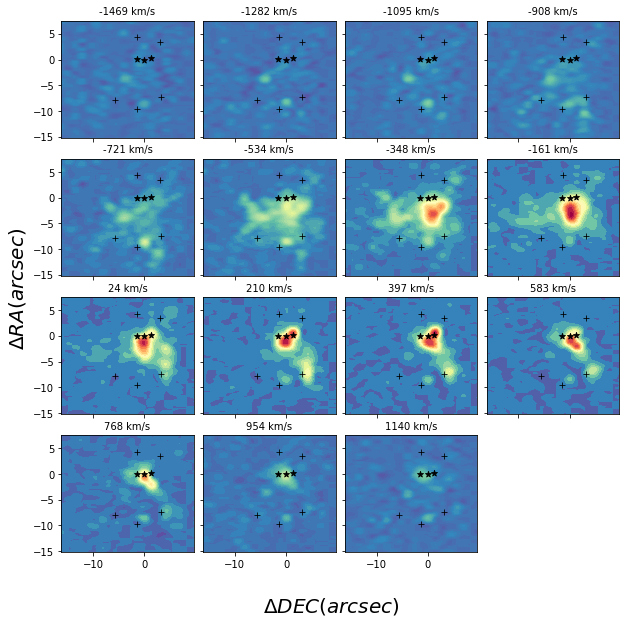

In [78]:
color_max,color_min=np.max(Slices),np.min(Slices)
fig,AX=plt.subplots(4,4,sharex=True,sharey=True)
AX=AX.flatten()
for i in range(Slices.shape[0]):
    AX[i].contourf(y,x,Slices[i,:,:],cmap='Spectral_r',
                   levels=20,vmax=color_max,vmin=color_min)
    AX[i].set_title(str(int(slices_loc[i]))+' km/s',fontsize=10)
    AX[i].set_aspect('equal')
    for j in range(len(sources)):
        if j <=2:
            mk='*'
        else:
            mk='+'
        AX[i].scatter(sources[j,0],sources[j,1],s=40.,
                      linewidth=.8, color='black',marker=mk)
fig.delaxes(AX[-1])
fig.text(0.5, 0.05, r'$\Delta DEC(arcsec)$', ha='center', fontsize=20.)
fig.text(0.05, 0.5, r'$\Delta RA(arcsec)$', va='center', rotation='vertical', fontsize=20.)
plt.subplots_adjust(wspace=0.07, hspace=0.07)
plt.rcParams['figure.figsize'] = [10, 10]
plt.savefig('slices.png',dpi=300)